In [1]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import requests as rq
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
main_df = pd.read_csv("C:/Users/Sean/Desktop/Gradschool/DSC630/weather_data.csv")

In [3]:
main_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TOBS
0,US10doug018,"OMAHA 4.3 WNW, NE US",41.2924,-96.0062,373.1,2015-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN
1,US10doug018,"OMAHA 4.3 WNW, NE US",41.2924,-96.0062,373.1,2015-01-02,NaN,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN
2,US10doug018,"OMAHA 4.3 WNW, NE US",41.2924,-96.0062,373.1,2015-01-03,NaN,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN
3,US10doug018,"OMAHA 4.3 WNW, NE US",41.2924,-96.0062,373.1,2015-01-04,NaN,NaN,0.07,0.7,NaN,NaN,NaN,NaN,NaN
4,US10doug018,"OMAHA 4.3 WNW, NE US",41.2924,-96.0062,373.1,2015-01-05,NaN,NaN,0.05,0.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82649,USC00252980,"FORT CALHOUN 4 W, NE US",41.4453,-96.0929,399.3,2021-12-28,NaN,NaN,0.00,0.0,0.0,NaN,30.0,24.0,30.0
82650,USC00252980,"FORT CALHOUN 4 W, NE US",41.4453,-96.0929,399.3,2021-12-29,NaN,NaN,0.00,0.0,0.0,NaN,39.0,7.0,7.0
82651,USC00252980,"FORT CALHOUN 4 W, NE US",41.4453,-96.0929,399.3,2021-12-30,NaN,NaN,0.00,0.0,0.0,NaN,21.0,7.0,15.0
82652,USC00252980,"FORT CALHOUN 4 W, NE US",41.4453,-96.0929,399.3,2021-12-31,NaN,NaN,0.00,0.0,0.0,NaN,38.0,15.0,24.0


In [4]:
test1 = main_df

In [5]:
test1.drop(["LATITUDE", "LONGITUDE", "ELEVATION", "STATION", "TOBS", "DAPR", "MDPR"], axis = 1, inplace = True)

In [6]:
test1 = test1[test1["TMAX"].notna()]

In [7]:
test1 = test1.drop(test1[test1["DATE"] == "2016-02-29"].index)
test1 = test1.drop(test1[test1["DATE"] == "2020-02-29"].index)

In [8]:
test1 = test1.drop(test1[test1["DATE"] == "2022-01-01"].index)

In [9]:
test1 = test1.groupby(["DATE"]).mean()

In [10]:
test1.index = pd.DatetimeIndex(test1.index).to_period("D")

In [11]:
test1

,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,
2015-01-01,0.0000,0.000,0.00,19.0,25.500000,1.000000
2015-01-02,0.0000,0.000,0.00,23.0,34.333333,12.333333
2015-01-03,0.0000,0.100,0.00,28.0,34.000000,14.333333
2015-01-04,0.0600,0.775,1.05,8.0,28.000000,-2.000000
2015-01-05,0.0125,0.450,1.30,9.0,12.000000,0.500000
...,...,...,...,...,...,...
2021-12-27,0.0000,0.000,0.00,33.0,42.500000,25.500000
2021-12-28,0.0000,0.000,0.00,33.0,36.000000,20.000000
2021-12-29,0.0000,0.000,0.00,16.0,35.333333,8.333333


In [12]:
avg_tb = test1.groupby(pd.Grouper(freq = "M")).mean()

In [13]:
avg_tb

,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,
2015-01,0.010000,0.091129,0.300000,27.193548,37.532258,15.879032
2015-02,0.040357,0.384821,2.159821,21.178571,30.196429,9.883929
2015-03,0.020618,0.005108,0.000000,43.193548,56.502688,28.747312
2015-04,0.121944,0.003333,0.000000,54.833333,64.075000,41.986111
2015-05,0.194113,0.000000,0.000000,62.032258,69.502688,51.145161
...,...,...,...,...,...,...
2021-08,0.180376,0.000000,0.000000,78.290323,85.793011,66.013441
2021-09,0.038917,0.000000,0.000000,70.900000,80.733333,58.138889
2021-10,0.180726,0.000000,0.000000,57.870968,66.943548,46.701613


In [14]:
mod = sm.tsa.statespace.SARIMAX(avg_tb["TAVG"], order = (1,1,1), seasonal_order = (1,1,1,12))
mod_fit = mod.fit()

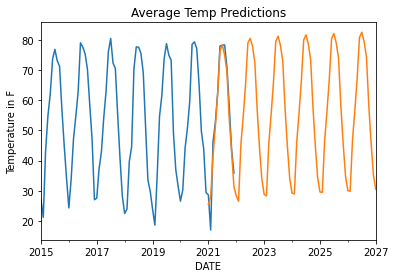

In [19]:
plt.figure()

avg_tb["TAVG"].plot()
mod_fit.predict(start = 72, end = 144).plot()
plt.title("Average Temp Predictions")
plt.ylabel("Temperature in F")

plt.show()


In [16]:
mod_tmin = sm.tsa.statespace.SARIMAX(avg_tb["TMIN"], order = (1,1,1), seasonal_order = (1,1,1,12))
mod_fit_min = mod_tmin.fit()

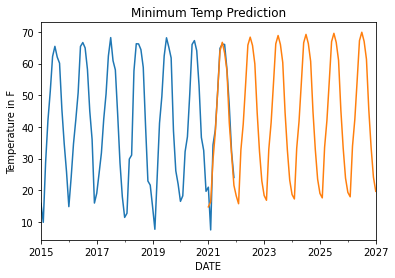

In [17]:
plt.figure()

avg_tb["TMIN"].plot()
mod_fit_min.predict(start = 72, end = 144).plot()
plt.title("Minimum Temp Prediction")
plt.ylabel("Temperature in F")

plt.show()

In [18]:
mod_tmax = sm.tsa.statespace.SARIMAX(avg_tb["TMAX"], order = (1,1,1), seasonal_order = (1,1,1,12))
mod_fit_max = mod_tmax.fit()

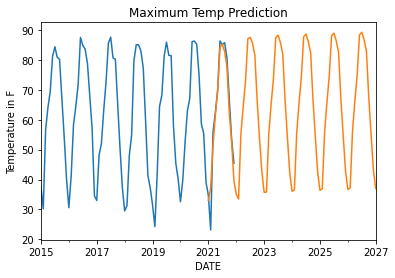

In [20]:
plt.figure()

avg_tb["TMAX"].plot()
mod_fit_max.predict(start = 72, end = 144).plot()
plt.title("Maximum Temp Prediction")
plt.ylabel("Temperature in F")

plt.show()

In [22]:
mod_snow = sm.tsa.statespace.SARIMAX(avg_tb["SNOW"], order = (1,1,1), seasonal_order = (1,1,1,12))
mod_fit_snow = mod_snow.fit()

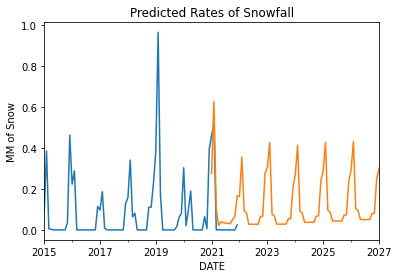

In [27]:
plt.figure()

avg_tb["SNOW"].plot()
mod_fit_snow.predict(start = 72, end = 144).plot()
plt.title("Predicted Rates of Snowfall")
plt.ylabel("MM of Snow")

plt.show()